# Importing, Understanding, and Inspecting Data

In [55]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [10]:
data = pd.read_excel('C:/Users/vinay/Desktop/Siplilearn/Data Analyst Masters Capstone/Banking/Dataset/data.xlsx')
print(data.head())

   UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    417566             53278       61360  89.63         67        22807   
2    539055             52378       60300  88.39         67        22807   
3    529269             46349       61500  76.42         67        22807   
4    563215             43594       78256  57.50         67        22744   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...  \
0               45                1441    1984-01-01        Salaried  ...   
1               45                1497    1985-08-24   Self employed  ...   
2               45                1495    1977-12-09   Self employed  ...   
3               45                1502    1988-06-01        Salaried  ...   
4               86                1499    1994-07-14   Self employed  ...   

  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0          

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [29]:
duplicates = data.duplicated().sum()
print(duplicates)

0


In [16]:
print(data.nunique())

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [31]:
missing_col = data.isnull().sum()[data.isnull().sum()>0]
print (missing_col)

Employment.Type    7661
dtype: int64


In [35]:
for col in missing_col.index:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    elif np.issubdtype(data[col].dtype, np.number):
        data[col].fillna(data[col].median(), inplace=True)
    elif np.issubdtype(data[col].dtype, np.datetime64):
        data[col].fillna(data[col].mode()[0], inplace=True)

In [37]:
    print(data.isnull().sum().sum())

0


In [39]:
key_columns = ['UniqueID', 'loan_default', 'disbursed_amount']
duplicate_rows = data.duplicated(subset=key_columns).sum()
print(duplicate_rows)

0


# Performing EDA

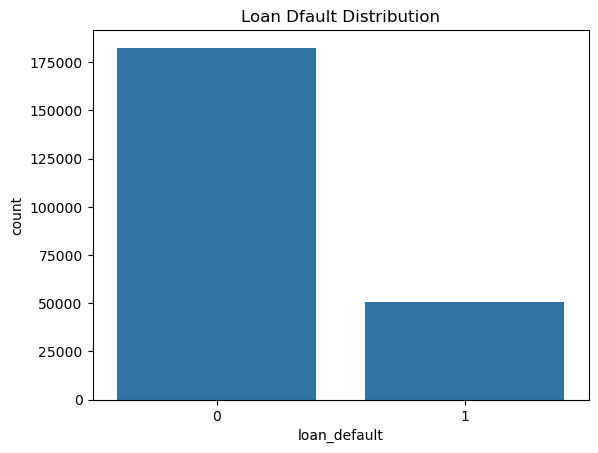

In [38]:
sns.countplot(x=data['loan_default'])
plt.title('Loan Dfault Distribution')
plt.show()

In [41]:
print(data['loan_default'].value_counts(normalize=True) * 100)

loan_default
0    78.292888
1    21.707112
Name: proportion, dtype: float64


In [43]:
data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,233154,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,1984-04-04 04:32:39.947502400,2018-09-23 09:57:53.079595520,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1949-09-15 00:00:00,2018-08-01 00:00:00,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,1977-05-04 00:00:00,2018-08-30 00:00:00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,1986-01-01 00:00:00,2018-09-25 00:00:00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,1992-05-19 00:00:00,2018-10-21 00:00:00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,2000-10-20 00:00:00,2018-10-31 00:00:00,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,NaN,NaN,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252


In [45]:
print(data['asset_cost'].unique())

[ 58400  61360  60300 ... 100244 115285  82734]


In [47]:
print(data['asset_cost'].describe())

count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: asset_cost, dtype: float64


In [49]:
print(data['disbursed_amount'].describe())

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64


In [51]:
print(data.loc[data['asset_cost'] > 1000000, 'asset_cost'])

198852    1328954
228130    1628992
Name: asset_cost, dtype: int64


In [53]:
data.columns = (
    data.columns
    .str.lower()
    .str.replace('','_')
    .str.replace('.', '_')
    .str.replace('-','_')
)

print(data.columns)

Index(['_u_n_i_q_u_e_i_d_', '_d_i_s_b_u_r_s_e_d___a_m_o_u_n_t_',
       '_a_s_s_e_t___c_o_s_t_', '_l_t_v_', '_b_r_a_n_c_h___i_d_',
       '_s_u_p_p_l_i_e_r___i_d_', '_m_a_n_u_f_a_c_t_u_r_e_r___i_d_',
       '_c_u_r_r_e_n_t___p_i_n_c_o_d_e___i_d_', '_d_a_t_e___o_f___b_i_r_t_h_',
       '_e_m_p_l_o_y_m_e_n_t___t_y_p_e_', '_d_i_s_b_u_r_s_a_l_d_a_t_e_',
       '_s_t_a_t_e___i_d_', '_e_m_p_l_o_y_e_e___c_o_d_e___i_d_',
       '_m_o_b_i_l_e_n_o___a_v_l___f_l_a_g_', '_a_a_d_h_a_r___f_l_a_g_',
       '_p_a_n___f_l_a_g_', '_v_o_t_e_r_i_d___f_l_a_g_',
       '_d_r_i_v_i_n_g___f_l_a_g_', '_p_a_s_s_p_o_r_t___f_l_a_g_',
       '_p_e_r_f_o_r_m___c_n_s___s_c_o_r_e_',
       '_p_e_r_f_o_r_m___c_n_s___s_c_o_r_e___d_e_s_c_r_i_p_t_i_o_n_',
       '_p_r_i___n_o___o_f___a_c_c_t_s_', '_p_r_i___a_c_t_i_v_e___a_c_c_t_s_',
       '_p_r_i___o_v_e_r_d_u_e___a_c_c_t_s_',
       '_p_r_i___c_u_r_r_e_n_t___b_a_l_a_n_c_e_',
       '_p_r_i___s_a_n_c_t_i_o_n_e_d___a_m_o_u_n_t_',
       '_p_r_i___d_i_s_b_u_r_s_e_d___a_m_

In [55]:
data.columns = data.columns.str.replace('_+','_', regex = True)

In [57]:
data.columns = data.columns.str.strip('_')

In [59]:
data

,u_n_i_q_u_e_i_d,d_i_s_b_u_r_s_e_d_a_m_o_u_n_t,a_s_s_e_t_c_o_s_t,l_t_v,b_r_a_n_c_h_i_d,s_u_p_p_l_i_e_r_i_d,m_a_n_u_f_a_c_t_u_r_e_r_i_d,c_u_r_r_e_n_t_p_i_n_c_o_d_e_i_d,d_a_t_e_o_f_b_i_r_t_h,e_m_p_l_o_y_m_e_n_t_t_y_p_e,...,s_e_c_s_a_n_c_t_i_o_n_e_d_a_m_o_u_n_t,s_e_c_d_i_s_b_u_r_s_e_d_a_m_o_u_n_t,p_r_i_m_a_r_y_i_n_s_t_a_l_a_m_t,s_e_c_i_n_s_t_a_l_a_m_t,n_e_w_a_c_c_t_s_i_n_l_a_s_t_s_i_x_m_o_n_t_h_s,d_e_l_i_n_q_u_e_n_t_a_c_c_t_s_i_n_l_a_s_t_s_i_x_m_o_n_t_h_s,a_v_e_r_a_g_e_a_c_c_t_a_g_e,c_r_e_d_i_t_h_i_s_t_o_r_y_l_e_n_g_t_h,n_o_o_f_i_n_q_u_i_r_i_e_s,l_o_a_n_d_e_f_a_u_l_t
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


In [61]:
data.columns = data.columns.str.replace('_', '')

In [46]:
data

,uniqueid,disbursedamount,assetcost,ltv,branchid,supplierid,manufacturerid,currentpincodeid,dateofbirth,employmenttype,...,secsanctionedamount,secdisbursedamount,primaryinstalamt,secinstalamt,newacctsinlastsixmonths,delinquentacctsinlastsixmonths,averageacctage,credithistorylength,noofinquiries,loandefault
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


In [63]:
data.columns = (
    data.columns
    .str.lower()
    .str.replace(' ','_')
    .str.replace('.', '_')
    .str.replace('-','_')
)

print(data.columns)

Index(['uniqueid', 'disbursedamount', 'assetcost', 'ltv', 'branchid',
       'supplierid', 'manufacturerid', 'currentpincodeid', 'dateofbirth',
       'employmenttype', 'disbursaldate', 'stateid', 'employeecodeid',
       'mobilenoavlflag', 'aadharflag', 'panflag', 'voteridflag',
       'drivingflag', 'passportflag', 'performcnsscore',
       'performcnsscoredescription', 'prinoofaccts', 'priactiveaccts',
       'prioverdueaccts', 'pricurrentbalance', 'prisanctionedamount',
       'pridisbursedamount', 'secnoofaccts', 'secactiveaccts',
       'secoverdueaccts', 'seccurrentbalance', 'secsanctionedamount',
       'secdisbursedamount', 'primaryinstalamt', 'secinstalamt',
       'newacctsinlastsixmonths', 'delinquentacctsinlastsixmonths',
       'averageacctage', 'credithistorylength', 'noofinquiries',
       'loandefault'],
      dtype='object')


In [65]:
import re

def format_column_name(col_name):
    col_name = re.sub(r'(?<!^)(?=[A-Z])', '_', col_name)
    return col_name.lower()

data.columns = [format_column_name(col) for col in data.columns]

print(data.columns)

Index(['uniqueid', 'disbursedamount', 'assetcost', 'ltv', 'branchid',
       'supplierid', 'manufacturerid', 'currentpincodeid', 'dateofbirth',
       'employmenttype', 'disbursaldate', 'stateid', 'employeecodeid',
       'mobilenoavlflag', 'aadharflag', 'panflag', 'voteridflag',
       'drivingflag', 'passportflag', 'performcnsscore',
       'performcnsscoredescription', 'prinoofaccts', 'priactiveaccts',
       'prioverdueaccts', 'pricurrentbalance', 'prisanctionedamount',
       'pridisbursedamount', 'secnoofaccts', 'secactiveaccts',
       'secoverdueaccts', 'seccurrentbalance', 'secsanctionedamount',
       'secdisbursedamount', 'primaryinstalamt', 'secinstalamt',
       'newacctsinlastsixmonths', 'delinquentacctsinlastsixmonths',
       'averageacctage', 'credithistorylength', 'noofinquiries',
       'loandefault'],
      dtype='object')


In [67]:
data.rename(columns={
    'uniqueid': 'unique_id',
    'disbursedamount': 'disbursed_amount',
    'assetcost': 'asset_cost',
    'ltv': 'ltv',
    'branchid': 'branch_id',
    'supplierid': 'supplier_id',
    'manufacturerid': 'manufacturer_id',
    'currentpincodeid': 'current_pincode_id',
    'dateofbirth': 'date_of_birth',
    'employmenttype': 'employment_type',
    'disbursaldate': 'disbursal_date',
    'stateid': 'state_id',
    'employeecodeid': 'employee_code_id',
    'mobilenoavlflag': 'mobile_no_avl_flag',
    'aadharflag': 'aadhar_flag',
    'panflag': 'pan_flag',
    'voteridflag': 'voter_id_flag',
    'drivingflag': 'driving_flag',
    'passportflag': 'passport_flag',
    'performcnsscore': 'perform_cns_score',
    'performcnsscoredescription': 'perform_cns_score_description',
    'prinoofaccts': 'pri_no_of_accts',
    'priactiveaccts': 'pri_active_accts',
    'prioverdueaccts': 'pri_overdue_accts',
    'pricurrentbalance': 'pri_current_balance',
    'prisanctionedamount': 'pri_sanctioned_amount',
    'pridisbursedamount': 'pri_disbursed_amount',
    'secnoofaccts': 'sec_no_of_accts',
    'secactiveaccts': 'sec_active_accts',
    'secoverdueaccts': 'sec_overdue_accts',
    'seccurrentbalance': 'sec_current_balance',
    'secsanctionedamount': 'sec_sanctioned_amount',
    'secdisbursedamount': 'sec_disbursed_amount',
    'primaryinstalamt': 'primary_instal_amt',
    'secinstalamt': 'sec_instal_amt',
    'newacctsinlastsixmonths': 'new_accts_in_last_six_months',
    'delinquentacctsinlastsixmonths': 'delinquent_accts_in_last_six_months',
    'averageacctage': 'average_acct_age',
    'credithistorylength': 'credit_history_length',
    'noofinquiries': 'no_of_inquiries',
    'loandefault': 'loan_default'
}, inplace=True)

print(data.columns)

Index(['unique_id', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursal_date', 'state_id', 'employee_code_id',
       'mobile_no_avl_flag', 'aadhar_flag', 'pan_flag', 'voter_id_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')


In [69]:
selected_columns = [
    'disbursed_amount', 'asset_cost', 'ltv', 'perform_cns_score', 
    'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 
    'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 
    'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 
    'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount', 
    'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months', 
    'delinquent_accts_in_last_six_months', 'average_acct_age', 'no_of_inquiries', 
    'loan_default'
]



data[selected_columns].describe()

,disbursed_amount,asset_cost,ltv,perform_cns_score,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,...,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,12971.314171,1.894478e+04,11.456636,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,13320.000000,3.700000e+04,10.030000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


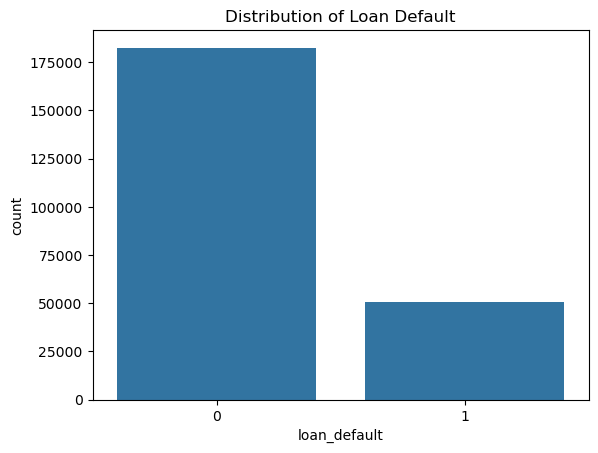

In [71]:
sns.countplot(x='loan_default', data = data)
plt.title('Distribution of Loan Default')
plt.show()

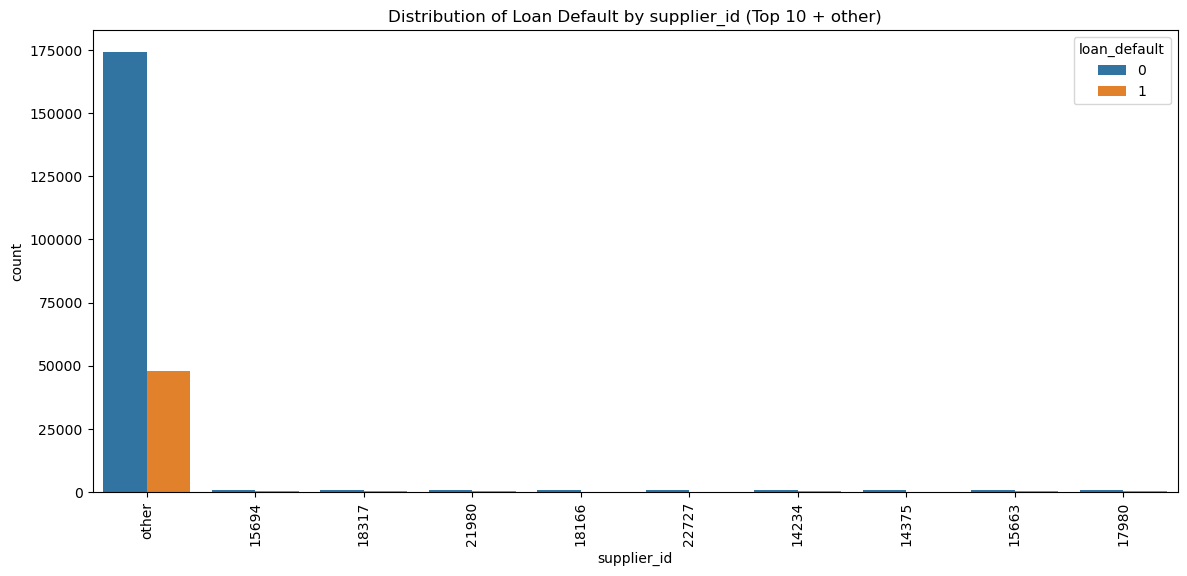

In [106]:
top_n = 10
top_categories = data['supplier_id'].value_counts().nlargest(top_n).index
data['supplier_id'] = np.where(data['supplier_id'].isin(top_categories), data['supplier_id'], 'other')

plt.figure(figsize=(14,6))
sns.countplot(x='supplier_id', hue='loan_default', data=data)
plt.title(f'Distribution of Loan Default by supplier_id (Top {top_n} + other)')
plt.xticks(rotation=90)
plt.show()

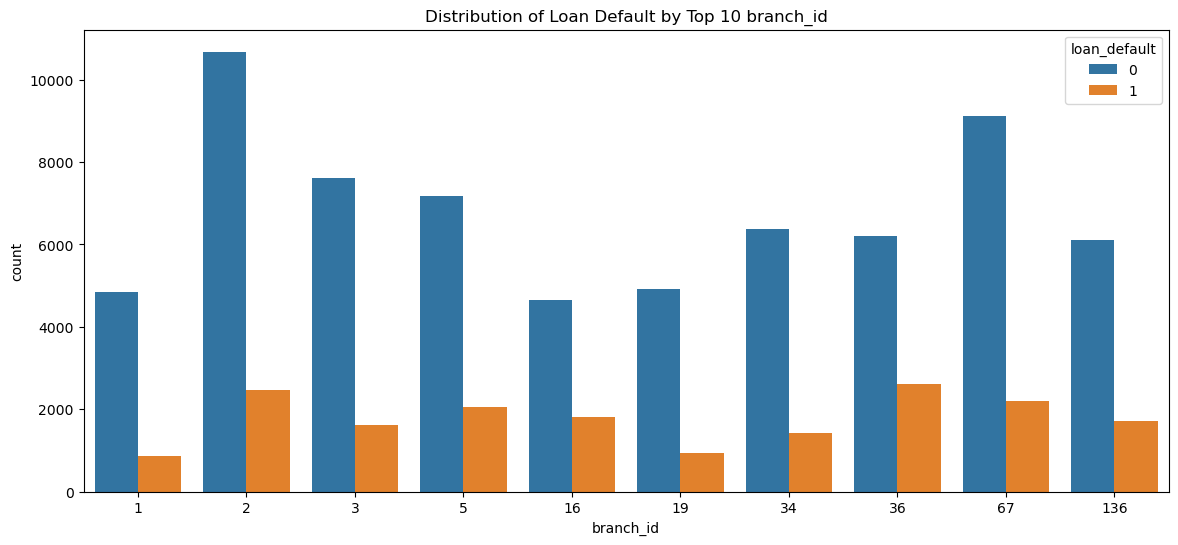

In [108]:
top_n = 10 
top_categories = data['branch_id'].value_counts().nlargest(top_n).index
filtered_data = data[data['branch_id'].isin(top_categories)]

plt.figure(figsize=(14, 6))
sns.countplot(x='branch_id', hue='loan_default', data=filtered_data)
plt.title(f'Distribution of Loan Default by Top {top_n} branch_id')
plt.show()

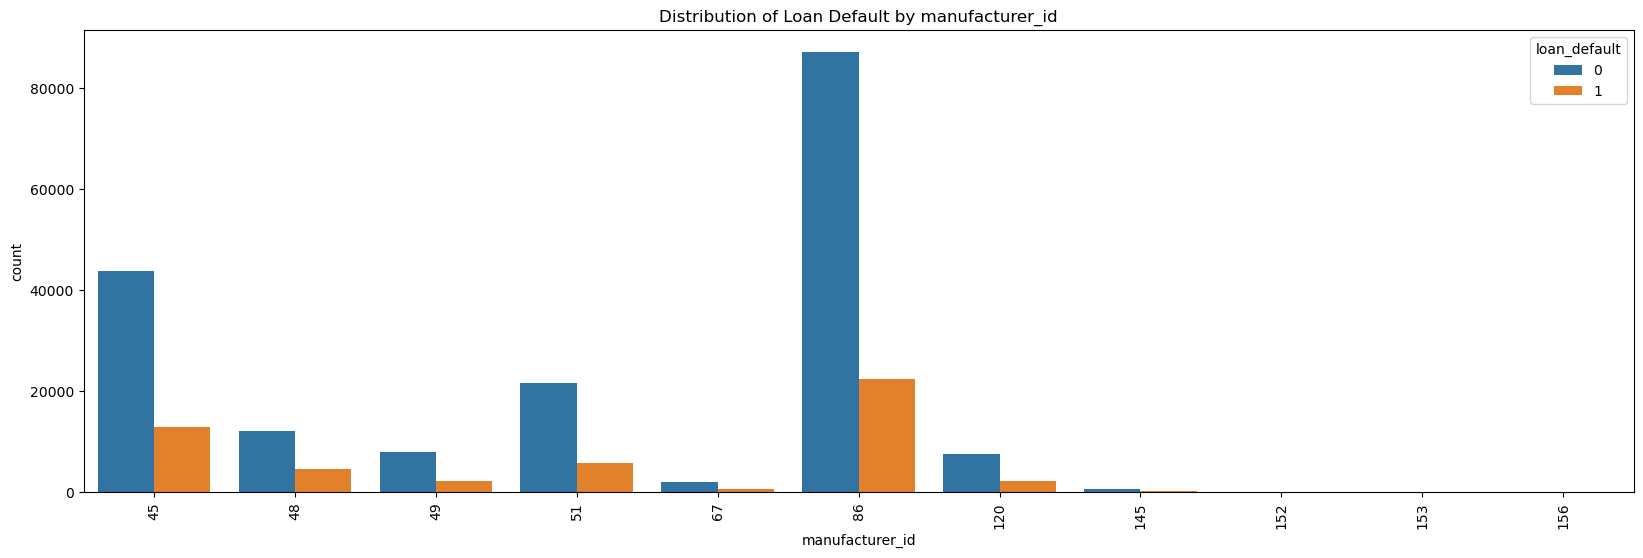

In [114]:
plt.figure(figsize=(20, 6))
sns.countplot(x='manufacturer_id', hue='loan_default', data=data)
plt.title(f'Distribution of Loan Default by manufacturer_id')
plt.xticks(rotation=90)
plt.show()

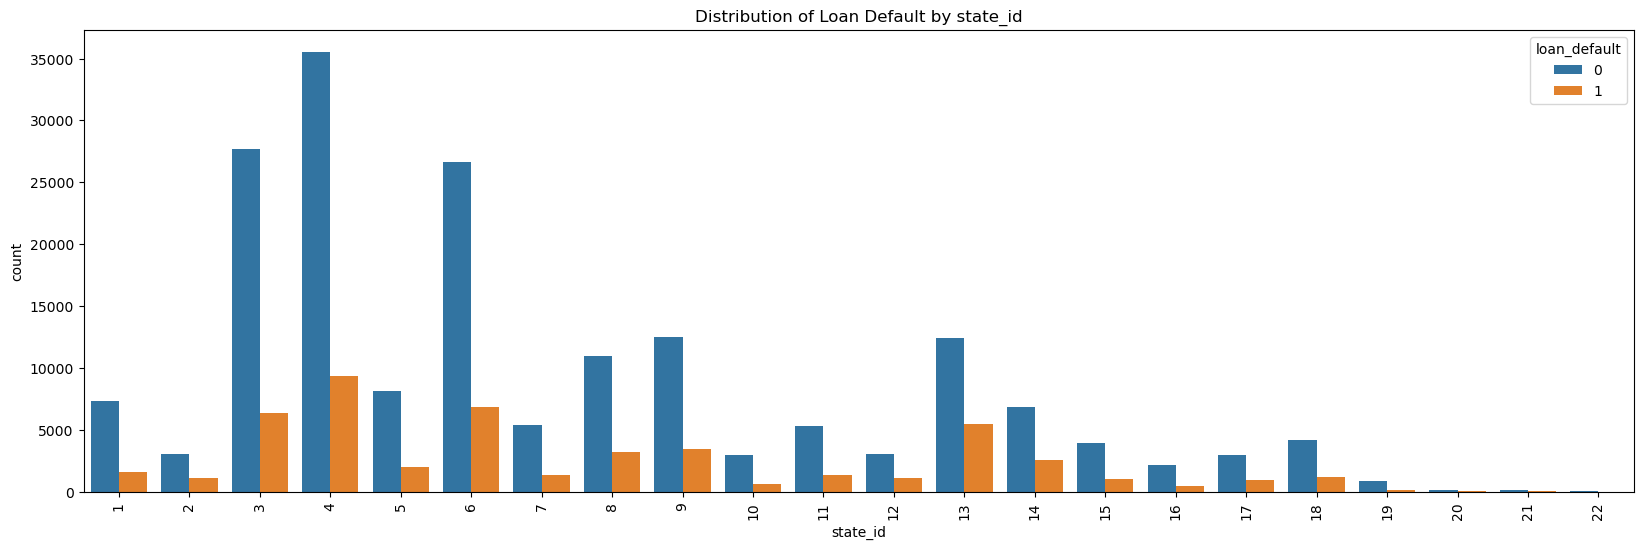

In [116]:
plt.figure(figsize=(20, 6))
sns.countplot(x='state_id', hue='loan_default', data=data)
plt.title('Distribution of Loan Default by state_id')
plt.xticks(rotation=90)
plt.show()

In [120]:
data.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data.csv', index=False)

In [28]:
data = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data.csv')

In [30]:
employment_types = data['employment_type'].unique()

print(employment_types)

['Salaried' 'Self employed']


In [32]:
missing_values = data['employment_type'].isnull().sum()

print(missing_values)

0


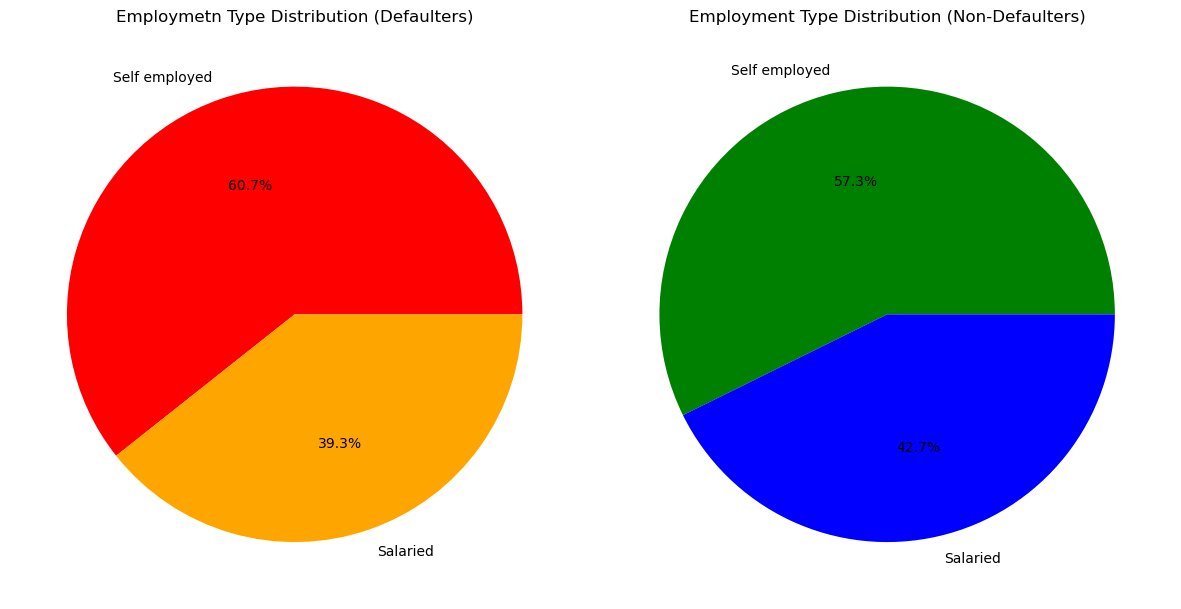

In [34]:
defaulters = data[data['loan_default'] == 1]['employment_type'].value_counts()
non_defaulters = data[data['loan_default'] == 0]['employment_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].pie(defaulters, labels=defaulters.index, autopct='%1.1f%%', colors=['red', 'orange'])
axes[0].set_title('Employmetn Type Distribution (Defaulters)')

axes[1].pie(non_defaulters, labels=non_defaulters.index, autopct='%1.1f%%', colors=['green', 'blue'])
axes[1].set_title('Employment Type Distribution (Non-Defaulters)')

plt.tight_layout()
plt.show()

In [44]:
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')

data['age'] = (pd.to_datetime('today')- data['date_of_birth']).dt.days // 365

print(data[['date_of_birth', 'age']].head())

  date_of_birth  age
0    1984-01-01   41
1    1985-08-24   39
2    1977-12-09   47
3    1988-06-01   36
4    1994-07-14   30


In [52]:
missing_ages = data['age'].isnull().sum()
print(missing_ages)

invalid_ages = data[(data['age'] <18) | (data['age'] >100)]
print(invalid_ages['date_of_birth'])

0
Series([], Name: date_of_birth, dtype: datetime64[ns])


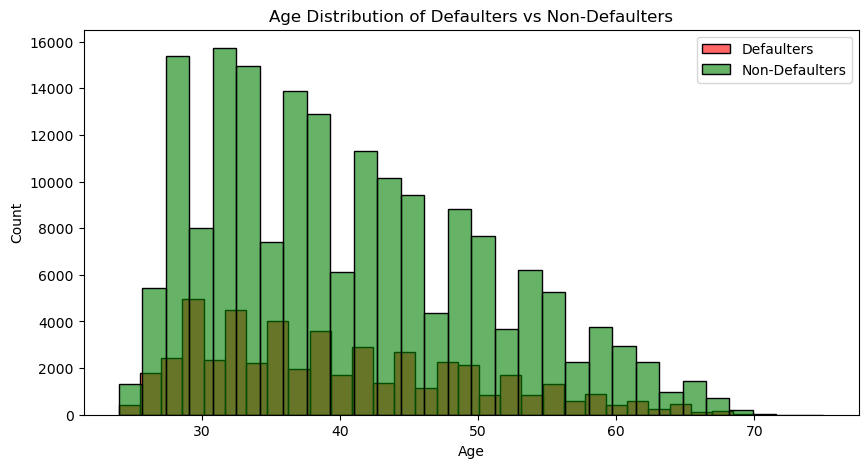

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['loan_default'] == 1]['age'], bins=30, color='red', alpha=0.6, label='Defaulters')
sns.histplot(data[data['loan_default'] == 0]['age'], bins=30, color='green', alpha=0.6, label='Non-Defaulters')

plt.title('Age Distribution of Defaulters vs Non-Defaulters')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [74]:
id_columns = ['aadhar_flag', 'pan_flag', 'voter_id_flag', 'driving_flag', 'passport_flag']

id_counts = pd.DataFrame(index=id_columns, columns=['count'])

for col in id_columns:
    id_counts.loc[col, 'count'] = data[col].sum()

print(id_counts)

                count
aadhar_flag    195924
pan_flag        17621
voter_id_flag   33794
driving_flag     5419
passport_flag     496


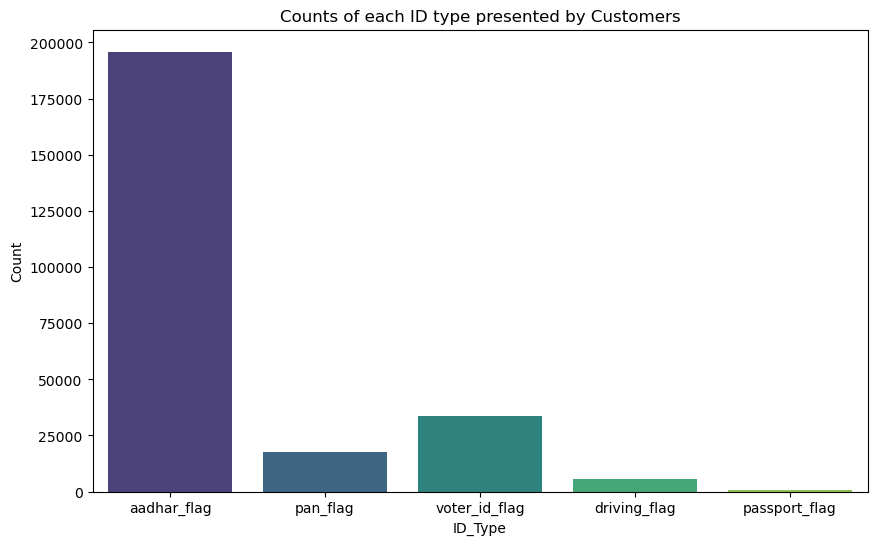

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(x=id_counts.index, y=id_counts['count'], hue=id_counts.index, palette='viridis', legend=False)

plt.title('Counts of each ID type presented by Customers')
plt.xlabel('ID_Type')
plt.ylabel('Count')

plt.show()

In [104]:
credit_bureau_cols = data.filter(like='Credit Bureau', axis=1)

print(credit_bureau_cols)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[233154 rows x 0 columns]


In [106]:
missing_scores = data['perform_cns_score'].isnull().sum()
print(missing_scores)

0


In [120]:
invalid_scores = data[(data['perform_cns_score'] < 300) | (data['perform_cns_score'] > 900)]
print(invalid_scores['perform_cns_score'])

0          0
1          0
2          0
3          0
4          0
          ..
233149    14
233150    14
233151    11
233152    11
233153    11
Name: perform_cns_score, Length: 129785, dtype: int64


In [122]:
data.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data.csv', index=False)

In [126]:
data_v2 = data[(data['perform_cns_score'] >= 300) & (data['perform_cns_score'] <= 900)]
print(data.shape)
print(data_v2.shape)

(233154, 42)
(103369, 42)


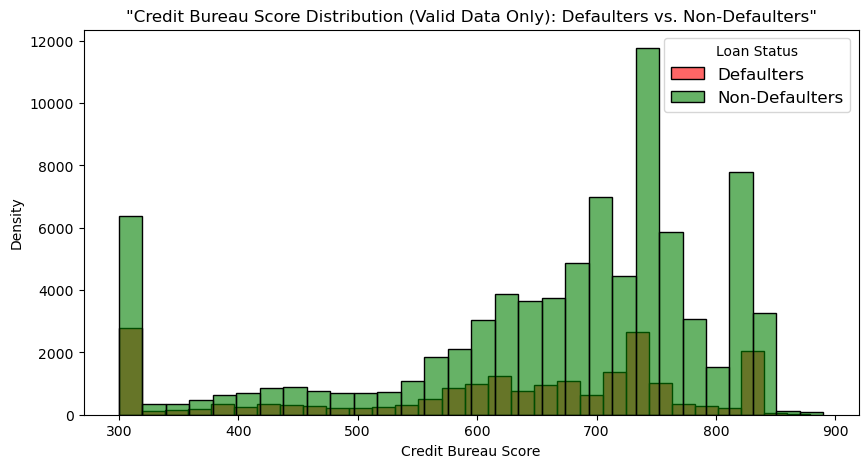

In [143]:
plt.figure(figsize=(10,5))
sns.histplot(data_v2[data_v2['loan_default'] ==1]['perform_cns_score'], bins=30, color='red', alpha=0.6, label='Defaulters')
sns.histplot(data_v2[data_v2['loan_default'] ==0]['perform_cns_score'], bins=30, color='green', alpha=0.6, label='Non-Defaulters')

plt.title('"Credit Bureau Score Distribution (Valid Data Only): Defaulters vs. Non-Defaulters"')
plt.xlabel('Credit Bureau Score')
plt.ylabel('Density')
plt.legend(title="Loan Status", fontsize=12)
plt.show()

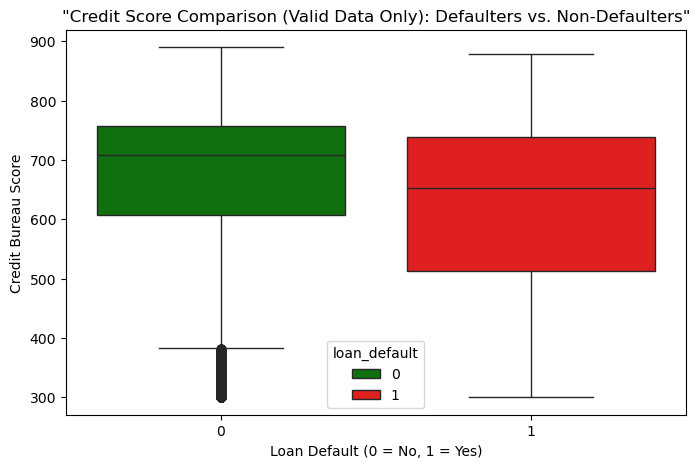

In [147]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_default', y='perform_cns_score', data= data_v2,hue ='loan_default', palette=['green', 'red'])

plt.title('"Credit Score Comparison (Valid Data Only): Defaulters vs. Non-Defaulters"')
plt.xlabel('Loan Default (0 = No, 1 = Yes)')
plt.ylabel('Credit Bureau Score')
plt.show()

In [159]:
data.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data.csv', index=False)
data_v2.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data_v2.csv', index=False)

In [6]:
data = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data.csv')
data_v2 = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data_v2.csv')

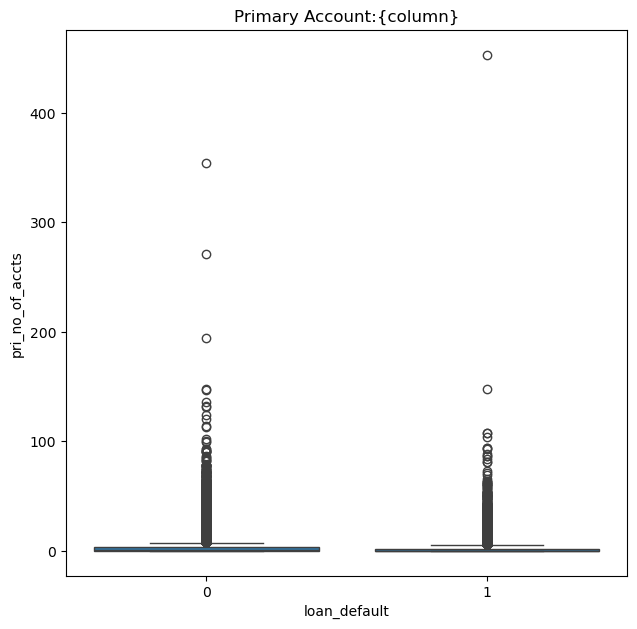

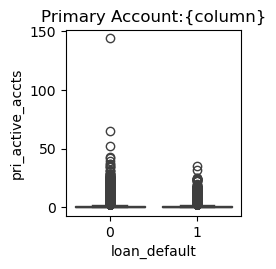

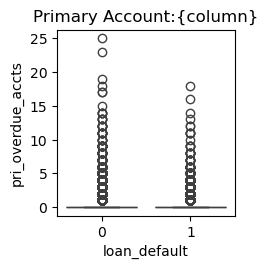

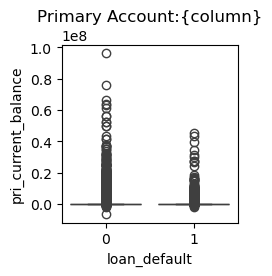

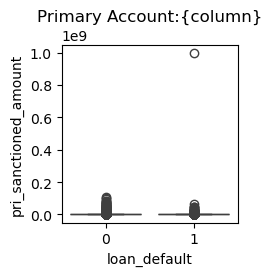

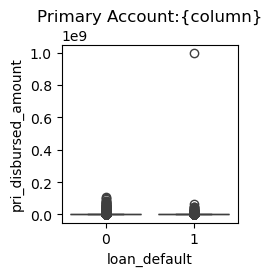

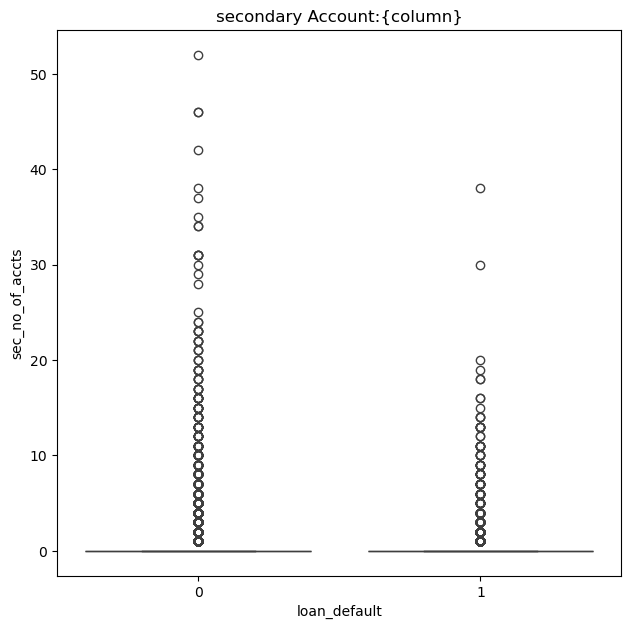

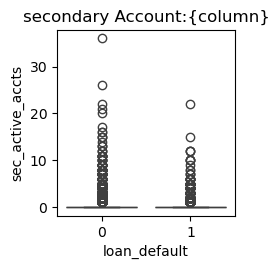

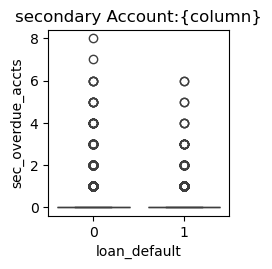

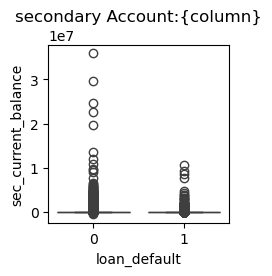

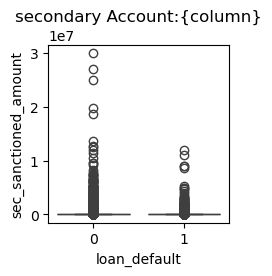

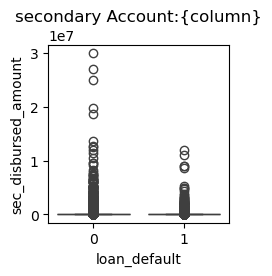

In [14]:
primary_account_columns = ['pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount']
secondary_account_columns = ['sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount']

plt.figure(figsize=(18,12))
for i, column in enumerate(primary_account_columns, 1):
    plt.subplot(2,3,1)
    sns.boxplot(x='loan_default', y=column, data=data)
    plt.title('Primary Account:{column}')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(18,12))
for i, column in enumerate(secondary_account_columns, 1):
    plt.subplot(2,3,1)
    sns.boxplot(x='loan_default', y=column, data=data)
    plt.title('secondary Account:{column}')
    plt.tight_layout()
    plt.show()

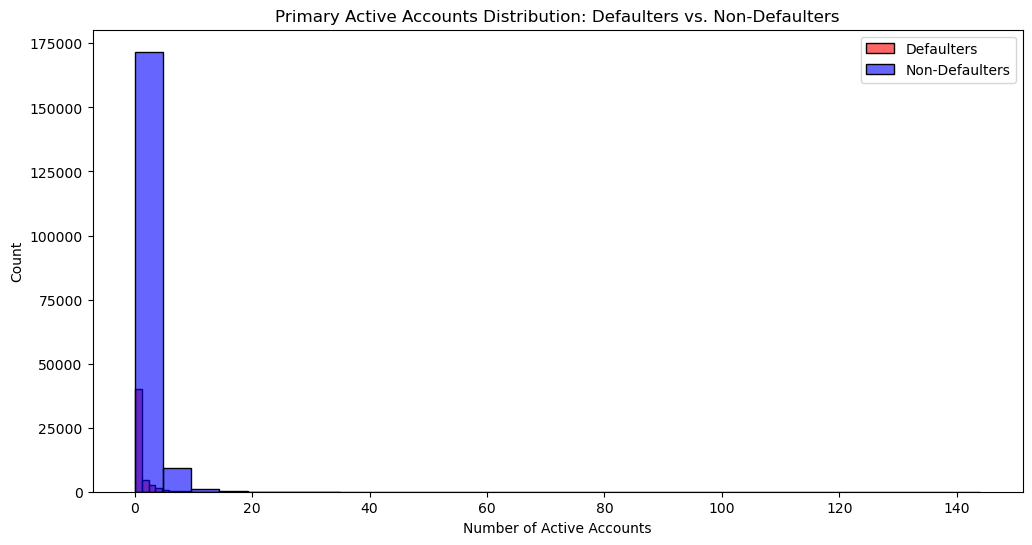

In [28]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['loan_default'] == 1]['pri_active_accts'], bins=30, color='red', alpha=0.6, label='Defaulters')
sns.histplot(data[data['loan_default'] == 0]['pri_active_accts'], bins=30, color='blue', alpha=0.6, label='Non-Defaulters')

plt.title("Primary Active Accounts Distribution: Defaulters vs. Non-Defaulters")
plt.xlabel("Number of Active Accounts")
plt.ylabel("Count")
plt.legend()

plt.show()

In [40]:
pd.set_option('display.float_format', '{:.0f}'.format)
loan_amount_summary = data[['pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_sanctioned_amount', 'sec_disbursed_amount']].describe()
print(loan_amount_summary)

       pri_sanctioned_amount  pri_disbursed_amount  sec_sanctioned_amount  \
count                 233154                233154                 233154   
mean                  218504                218066                   7296   
std                  2374794               2377744                 183156   
min                        0                     0                      0   
25%                        0                     0                      0   
50%                        0                     0                      0   
75%                    62500                 60800                      0   
max               1000000000            1000000000               30000000   

       sec_disbursed_amount  
count                233154  
mean                   7180  
std                  182593  
min                       0  
25%                       0  
50%                       0  
75%                       0  
max                30000000  


In [54]:
data['pri_amount_difference'] = data['pri_sanctioned_amount'] - data['pri_disbursed_amount']
data['sec_amount_difference'] = data['sec_sanctioned_amount'] - data['sec_disbursed_amount']

amount_diff_summary = data[['pri_amount_difference', 'sec_amount_difference']].describe()
print(amount_diff_summary)

       pri_amount_difference  sec_amount_difference
count                 233154                 233154
mean                     438                    116
std                   118979                   4896
min                -50000000                -149432
25%                        0                      0
50%                        0                      0
75%                        0                      0
max                  1444196                 865353


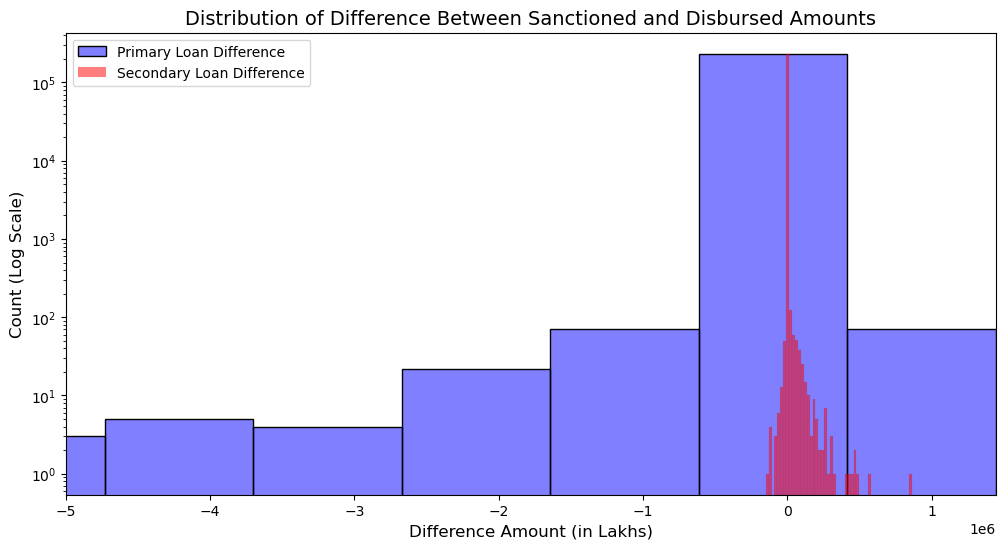

In [70]:
plt.figure(figsize=(12,6))

x_min = max(data[['pri_amount_difference', 'sec_amount_difference']].min().min(), -5e6)  
x_max = min(data[['pri_amount_difference', 'sec_amount_difference']].max().max(), 5e6)  

sns.histplot(data['pri_amount_difference'], bins=50, color='blue', alpha=0.5, label='Primary Loan Difference')

sns.histplot(data['sec_amount_difference'], bins=50, color='red', alpha=0.5, label='Secondary Loan Difference')

plt.title("Distribution of Difference Between Sanctioned and Disbursed Amounts", fontsize=14)
plt.xlabel("Difference Amount (in Lakhs)", fontsize=12)
plt.ylabel("Count (Log Scale)", fontsize=12)

plt.xlim(x_min, x_max)
plt.yscale("log")
plt.legend()
plt.show()


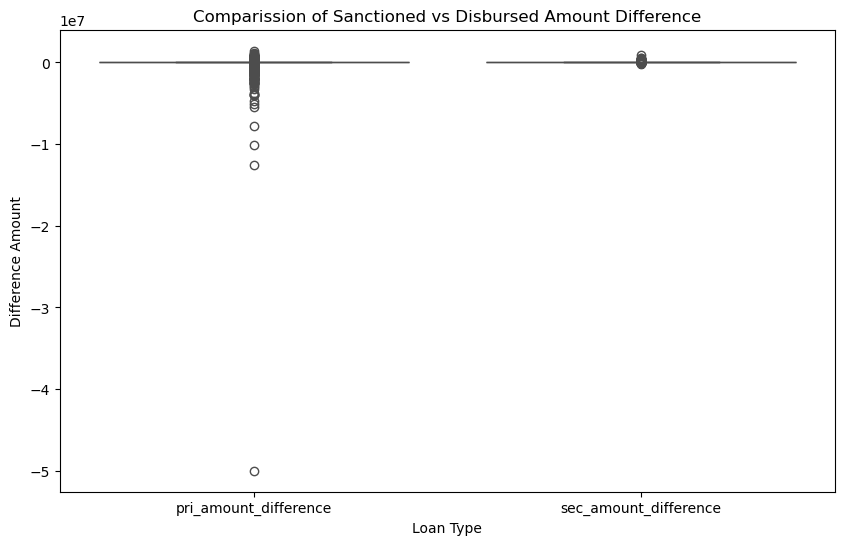

In [72]:
plt.figure(figsize=(10,6))

sns.boxplot(data=data[['pri_amount_difference', 'sec_amount_difference']], palette=['blue', 'red'])

plt.title('Comparission of Sanctioned vs Disbursed Amount Difference')
plt.xlabel('Loan Type')
plt.ylabel('Difference Amount')

plt.show()

In [76]:
inquiry_summary = data.groupby('loan_default')['no_of_inquiries'].describe()
print(inquiry_summary)

              count  mean  std  min  25%  50%  75%  max
loan_default                                           
0            182543     0    1    0    0    0    0   36
1             50611     0    1    0    0    0    0   19


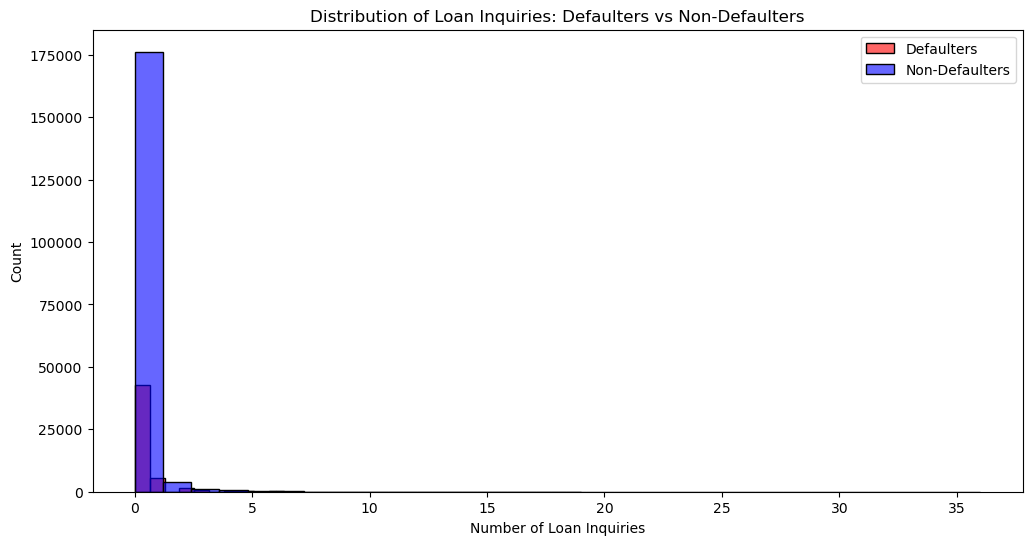

In [82]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['loan_default'] == 1]['no_of_inquiries'], bins=30, color='red', alpha=0.6, label='Defaulters')
sns.histplot(data[data['loan_default'] == 0]['no_of_inquiries'], bins=30, color='blue', alpha=0.6, label='Non-Defaulters')

plt.title('Distribution of Loan Inquiries: Defaulters vs Non-Defaulters')
plt.xlabel('Number of Loan Inquiries')
plt.ylabel('Count')
plt.legend()
plt.show()

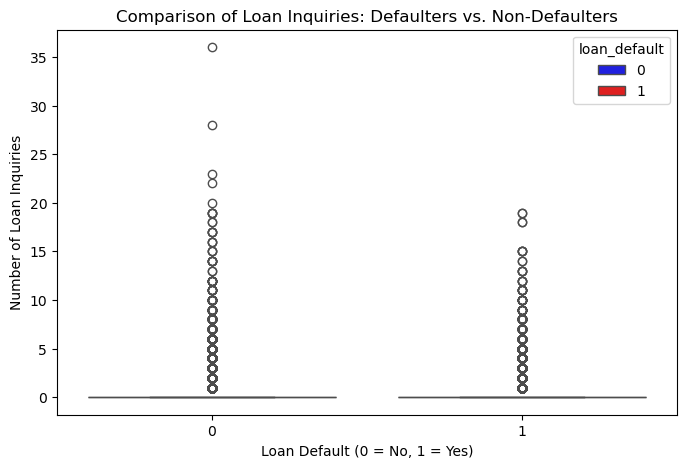

In [94]:
plt.figure(figsize=(8,5))

sns.boxplot(x='loan_default', y='no_of_inquiries', data=data, hue='loan_default', palette={0: 'blue', 1: 'red'})

plt.title("Comparison of Loan Inquiries: Defaulters vs. Non-Defaulters")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Number of Loan Inquiries")
plt.show()

In [98]:
print(data.dtypes)

unique_id                                int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                             object
manufacturer_id                          int64
current_pincode_id                       int64
date_of_birth                           object
employment_type                         object
disbursal_date                          object
state_id                                 int64
employee_code_id                         int64
mobile_no_avl_flag                       int64
aadhar_flag                              int64
pan_flag                                 int64
voter_id_flag                            int64
driving_flag                             int64
passport_flag                            int64
perform_cns_score                        int64
perform_cns_score_description           object
pri_no_of_acc

In [106]:
def convert_credit_history_to_months(value):
    if pd.isnull(value) or value == '':
        return None
    parts = value.split()
    years = 0
    months = 0
    
    for part in parts:
        if 'yrs' in part:
            years = int(part.replace('yrs', ""))
        elif 'mon' in part:
            months = int(part.replace('mon', ""))

    return (years * 12) + months

In [110]:
data['credit_history_length_months'] = data['credit_history_length'].apply(convert_credit_history_to_months)

data['credit_history_length_months'] = pd.to_numeric(data['credit_history_length_months'])

In [112]:
print(data['credit_history_length_months'])

0          0
1          0
2          0
3          0
4          0
          ..
233149    28
233150    17
233151    46
233152    38
233153    64
Name: credit_history_length_months, Length: 233154, dtype: int64


In [120]:
credit_history_summary = data.groupby('loan_default')[['new_accts_in_last_six_months', 
                                                       'delinquent_accts_in_last_six_months', 
                                                       'credit_history_length_months']].describe()

print(credit_history_summary)

             new_accts_in_last_six_months                               \
                                    count mean std min 25% 50% 75% max   
loan_default                                                             
0                                  182543    0   1   0   0   0   0  35   
1                                   50611    0   1   0   0   0   0  20   

             delinquent_accts_in_last_six_months       ...          \
                                           count mean  ... 75% max   
loan_default                                           ...           
0                                         182543    0  ...   0  20   
1                                          50611    0  ...   0  12   

             credit_history_length_months                               
                                    count mean std min 25% 50% 75% max  
loan_default                                                            
0                                  182543   17  29   0   0 

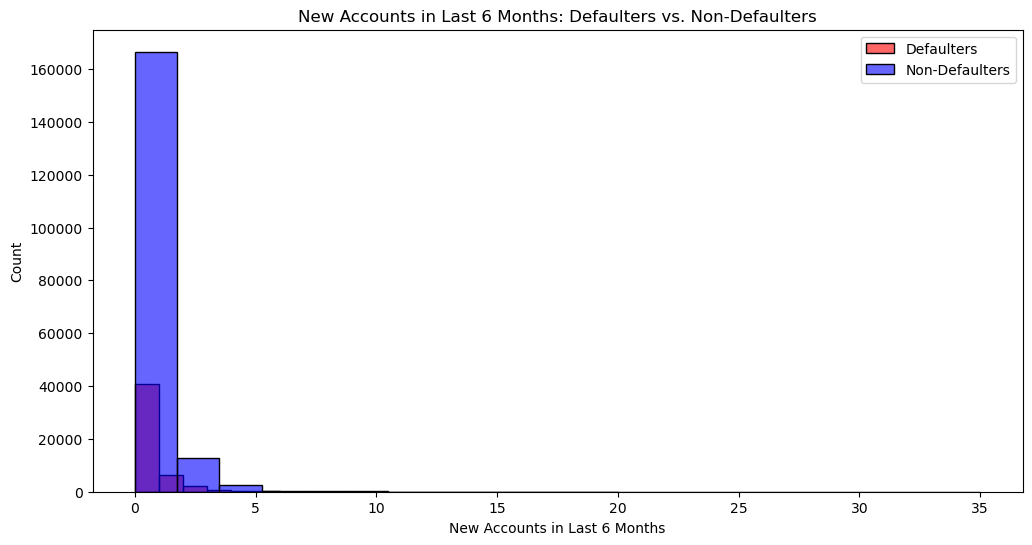

In [139]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['loan_default'] == 1]['new_accts_in_last_six_months'], bins=20, color='red', alpha=0.6, label='Defaulters')
sns.histplot(data[data['loan_default'] == 0]['new_accts_in_last_six_months'], bins=20, color='blue', alpha=0.6, label='Non-Defaulters')

plt.title("New Accounts in Last 6 Months: Defaulters vs. Non-Defaulters")
plt.xlabel("New Accounts in Last 6 Months")
plt.ylabel("Count")
plt.legend()
plt.show()

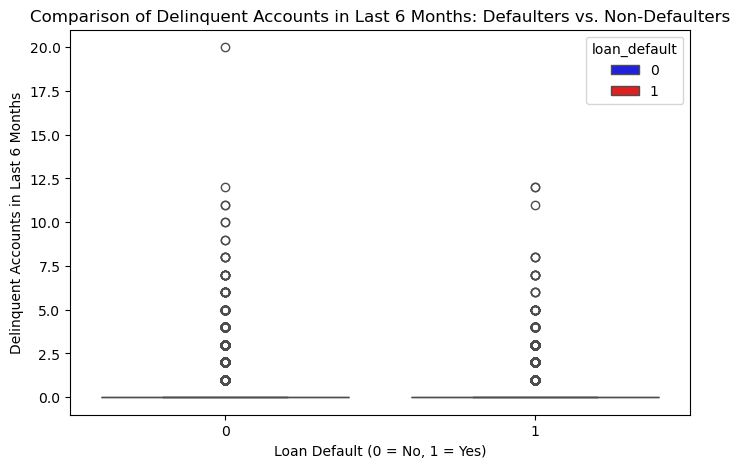

In [141]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_default', y='delinquent_accts_in_last_six_months', data=data, hue='loan_default', palette={0: 'blue', 1: 'red'})
plt.title("Comparison of Delinquent Accounts in Last 6 Months: Defaulters vs. Non-Defaulters")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Delinquent Accounts in Last 6 Months")
plt.show()

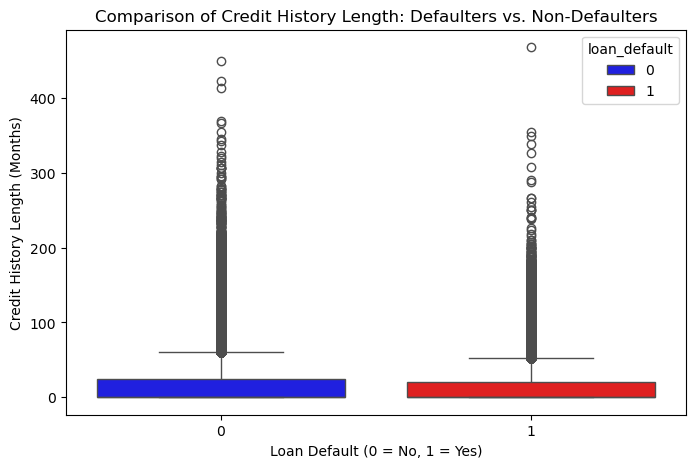

In [143]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_default', y='credit_history_length_months', data=data, hue='loan_default', palette={0: 'blue', 1: 'red'})
plt.title("Comparison of Credit History Length: Defaulters vs. Non-Defaulters")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Credit History Length (Months)")
plt.show()


In [145]:
print(data.dtypes)

unique_id                                int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                             object
manufacturer_id                          int64
current_pincode_id                       int64
date_of_birth                           object
employment_type                         object
disbursal_date                          object
state_id                                 int64
employee_code_id                         int64
mobile_no_avl_flag                       int64
aadhar_flag                              int64
pan_flag                                 int64
voter_id_flag                            int64
driving_flag                             int64
passport_flag                            int64
perform_cns_score                        int64
perform_cns_score_description           object
pri_no_of_acc

In [150]:
data.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data.csv', index=False)
data_v2.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data_v2.csv', index=False)

In [6]:
data = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data.csv')
data_v2 = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data_v2.csv')

In [63]:
features = ['disbursed_amount', 'ltv', 'new_accts_in_last_six_months', 
            'delinquent_accts_in_last_six_months', 'credit_history_length_months',
            'no_of_inquiries', 'pri_active_accts', 'pri_overdue_accts']

x = data[features]
y = data['loan_default']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [65]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [67]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred = (y_pred_prob > 0.2).astype(int)

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[14563 22170]
 [ 2533  7365]]


In [71]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.40      0.54     36733
           1       0.25      0.74      0.37      9898

    accuracy                           0.47     46631
   macro avg       0.55      0.57      0.46     46631
weighted avg       0.72      0.47      0.51     46631



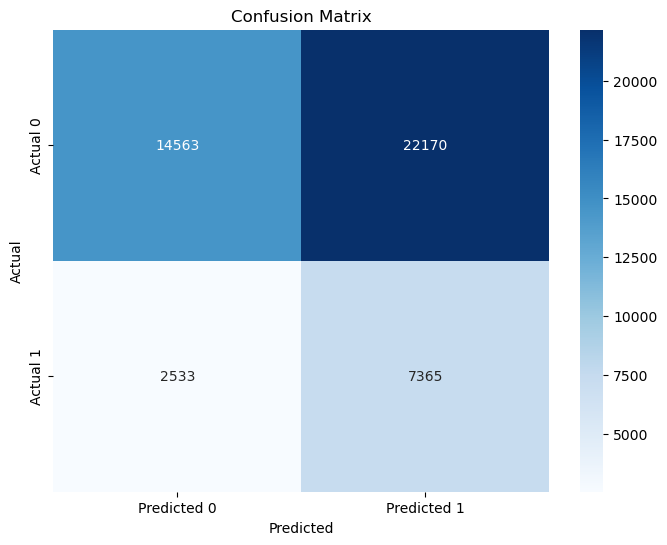

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [75]:
data.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data.csv', index=False)
data_v2.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Data Analyst Masters Capstone\Banking\Dataset\Updated data files\processed_data_v2.csv', index=False)